# Task 6.6 Sourcing & Analyzing Time-Series Data

### 1. Import libraries including Quandl

In [1040]:
!pip install quandl

Defaulting to user installation because normal site-packages is not writeable
Looking in links: /usr/share/pip-wheels


In [1041]:
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm # Using .api imports the public access version of statsmodels, which is a library that handles 
# statistical models.
import os
import warnings # This is a library that handles warnings.
import matplotlib.dates as mdates


warnings.filterwarnings("ignore") # Disable deprecation warnings that could indicate, for instance, a suspended library or 
# feature. These are more relevant to developers and very seldom to analysts.

plt.style.use('fivethirtyeight') # This is a styling option for how your plots will appear.

In [1042]:
# This option ensures the graphs which will be created are displayed in the notebook without the need to "call" them specifically.
%matplotlib inline

### 2. Find a data set to work and import it into your Jupyter notebook

**Note:** The data set I am working with contains annual data for 2015, 2016, 2017, 2018, and 2019. I wish it included data for more years, but the analysis will be limited to these years. Also, I have to pick only one country (USA) and analyze the variation of the
Happiness Score over these years.

In [1045]:
# Import data
df = pd.read_csv('2015-2019_Dystopia.csv')

In [1046]:
# Verify the imported data
df.head()

,Happiness Rank,Country,Region,Happiness Score,GDP per Capita,Social Support,Life Expectancy,Freedom,Perceptions of Corruption,Generosity,Dystopia_Residuals,Year
0,1,Switzerland,Western Europe,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.517,2015
1,2,Iceland,Western Europe,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.702,2015
2,3,Denmark,Western Europe,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.492,2015
3,4,Norway,Western Europe,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.465,2015
4,5,Canada,North America,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.452,2015


### 3. Make a subset of your data set

In [1048]:
# Create a subset for df dataframe that only contains data from the United States
df_usa = df.loc[df['Country'].isin(['United States of America'])]

In [1049]:
# Verify the data in the data frame
df_usa

,Happiness Rank,Country,Region,Happiness Score,GDP per Capita,Social Support,Life Expectancy,Freedom,Perceptions of Corruption,Generosity,Dystopia_Residuals,Year
14,15,United States of America,North America,7.119,1.394510,1.247110,0.861790,0.546040,0.158900,0.401050,2.510,2015
170,13,United States of America,North America,7.104,1.507960,1.047820,0.779000,0.481630,0.148680,0.410770,2.728,2016
327,14,United States of America,North America,6.993,1.546259,1.419921,0.774287,0.505741,0.135639,0.392579,2.219,2017
486,18,United States of America,North America,6.886,1.398000,1.471000,0.819000,0.547000,0.133000,0.291000,2.227,2018
643,19,United States of America,North America,6.892,1.433000,1.457000,0.874000,0.454000,0.128000,0.280000,2.266,2019


In [1050]:
# Drop the unnecessary columns

df_usa_nec = df_usa.drop(columns = ['Happiness Rank', 'Country', 'Region', 'GDP per Capita', 'Social Support', 'Life Expectancy', 'Freedom', 'Perceptions of Corruption', 'Generosity', 'Dystopia_Residuals'])

In [1051]:
# Make column 'Year' the first column
df_usa_nec=df_usa_nec[['Year', 'Happiness Score']]

In [1052]:
# Reset index
df_usa_nec.reset_index(drop=True, inplace=True)

In [1053]:
# Verify the column data types
df_usa_nec[['Year', 'Happiness Score']].dtypes

Year                 int64
Happiness Score    float64
dtype: object

In [1054]:
df_usa_nec

,Year,Happiness Score
0,2015,7.119
1,2016,7.104
2,2017,6.993
3,2018,6.886
4,2019,6.892


### 4. Create a line chart of your data

Text(0.5, 1.0, 'USA Happiness Score Between 2015 and 2019')

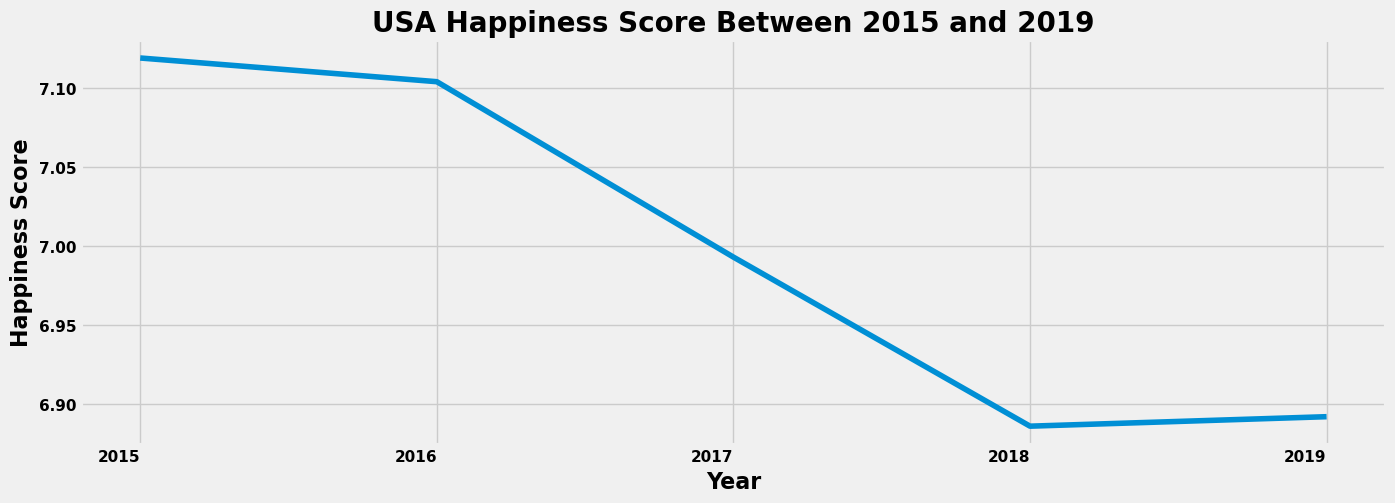

In [1056]:
# Plot the data using Seaborn.
plt.figure(figsize=(15,5), dpi=100)

line = sns.lineplot(data = df_usa_nec, x = 'Year',y = 'Happiness Score')

# Set the x-axis ticks to only show whole years
plt.xticks(np.arange(df_usa_nec['Year'].min(), df_usa_nec['Year'].max() + 1, 1))  # Start, End, Step

# Format the x axis
plt.xticks(fontsize=11, fontweight='bold', ha='right')  # Set font properties
plt.xlabel('Year', fontsize=16, fontweight='bold', ha='center')

# Format the y axis
plt.yticks(fontsize=11, fontweight='bold')  # Set y-axis labels without rotation
plt.ylabel('Happiness Score', fontsize=16, fontweight='bold', ha='center')

# Set the title
plt.title("USA Happiness Score Between 2015 and 2019", fontsize=20, fontweight='bold')

### 5. Decompose the data’s components

In [1071]:
# First, create a new column named 'datetime' and then set it as the index
from datetime import datetime

df_usa_nec['datetime'] = pd.to_datetime(df_usa_nec['Year'], format='%Y') # Create a datetime column from "Year"
df_usa_nec = df_usa_nec.set_index('datetime') # Set the datetime as the index of the dataframe.
df_usa_nec.drop(['Year'], axis=1, inplace=True) # Drop the "Year" column.
df_usa_nec.head()

,Happiness Score
datetime,
2015-01-01,7.119
2016-01-01,7.104
2017-01-01,6.993
2018-01-01,6.886
2019-01-01,6.892


In [1073]:
# Decompose the time series using an additive model
decomposition = sm.tsa.seasonal_decompose(df_usa_nec, model='additive')

In [1076]:
from pylab import rcParams # This will define a fixed size for all special charts.

rcParams['figure.figsize'] = 18, 7

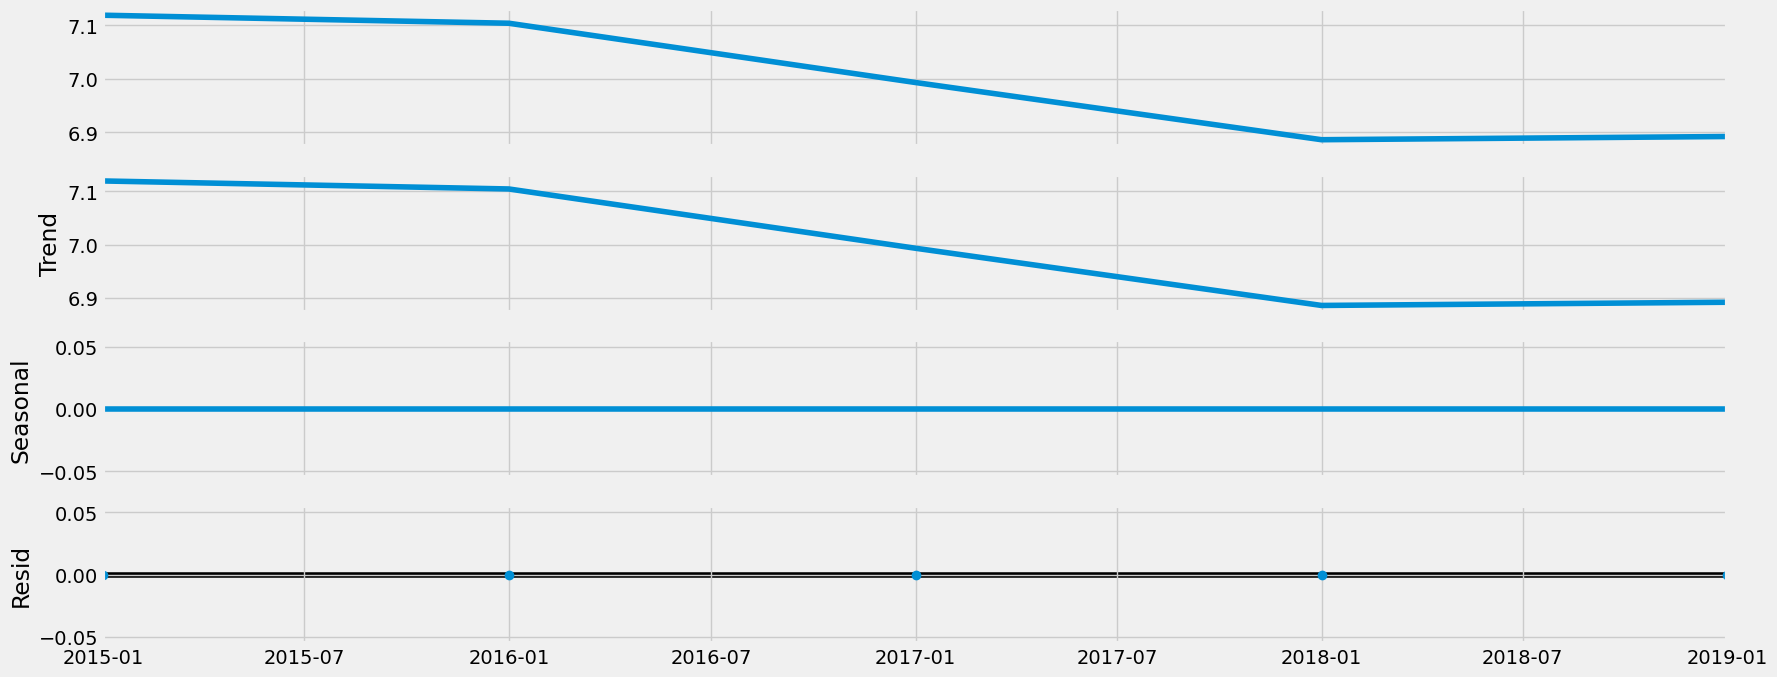

In [1079]:
# Plot the separate components

decomposition.plot()
plt.show()

**Comments:** 
Trend: The trend of the Happiness Score is downward from 2015 to 2018, with a slight uptick in 2019. This suggests an overall decline in happiness during this period, followed by a possible stabilization or minor recovery.

Seasonality: Given that the data is yearly and spans a relatively short period (5 years), it's not possible to discern any meaningful seasonal patterns. Seasonality typically refers to repeating patterns within a fixed period, like daily, monthly, or yearly cycles. With only 5 data points, identifying such patterns is not statistically sound.

Residual: The residual component represents the variability in the Happiness Score that is not explained by the trend or seasonality. In this case, the residual would capture the year-over-year fluctuations that deviate from the overall downward trend. For example, the slight increase in 2019 would be partly attributed to the residual component.

The lack of clear seasonality and the limited data underscore the need for further analysis with more data and additional variables to gain a deeper understanding of the dynamics of happiness over time.

### 6. Conduct a Dickey-Fuller test to check for stationarity

In [1089]:
from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(df_usa_nec['Happiness Score'])

Dickey-Fuller Stationarity test:
Test Statistic                -0.574175
p-value                        0.876711
Number of Lags Used            0.000000
Number of Observations Used    4.000000
Critical Value (1%)           -7.355441
Critical Value (5%)           -4.474365
Critical Value (10%)          -3.126933
dtype: float64


**Comments:** “Critical Value (5%)” in the results, has a value of -4.474365. This is much smaller than the test statistic, which is -0.574175. This means that the null hypothesis cannot be rejected, that there is a unit root in the data, and the data is not stationary.

### 7. Conduct a round of differencing on it and repeat step 6

In [1100]:
data_diff = df_usa_nec - df_usa_nec.shift(1) # The df.shift(1) function turns the observation to t-1, making the whole thing t - (t -1)
data_diff.dropna(inplace = True) # Remove the the missing values that came about as a result of the differencing.

In [1102]:
# Verify the data in the data frame
data_diff.head()

,Happiness Score
datetime,
2016-01-01,-0.015
2017-01-01,-0.111
2018-01-01,-0.107
2019-01-01,0.006


In [1107]:
# Verify the columns in the data frame
data_diff.columns

Index(['Happiness Score'], dtype='object')

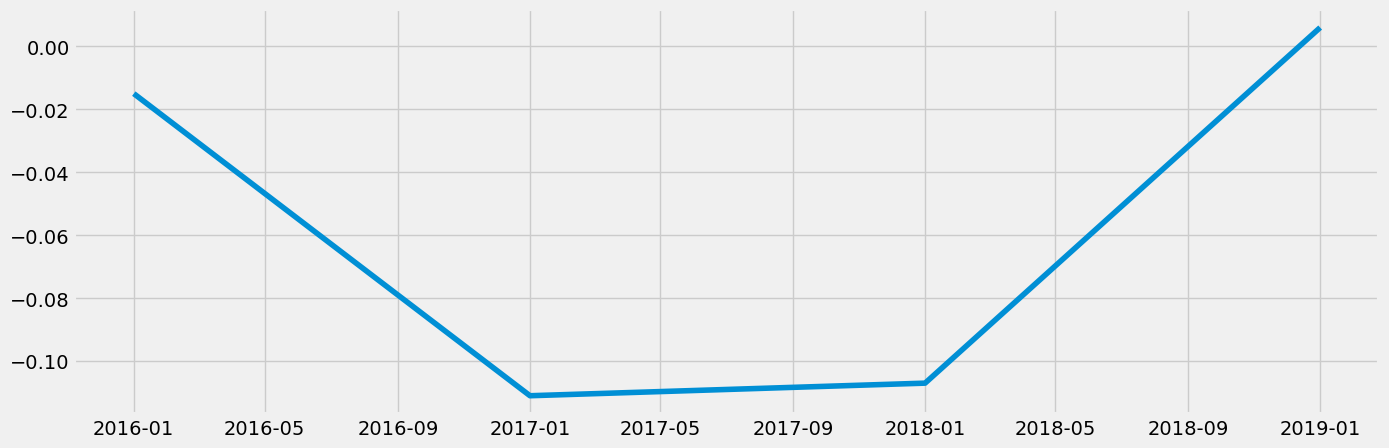

In [1110]:
# Check out what the differencing did to the time-series curve

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff)

In [1114]:
# Re-run the Dickey-Fuller test
dickey_fuller(data_diff)

Dickey-Fuller Stationarity test:
Test Statistic                 -1.508849
p-value                         0.529130
Number of Lags Used             0.000000
Number of Observations Used     3.000000
Critical Value (1%)           -10.417191
Critical Value (5%)            -5.778381
Critical Value (10%)           -3.391681
dtype: float64


**Comments:** Critical Value (5%) in the results, has a value of -5.778381. 
This is much smaller than the test statistic, which is -1.508849, which means 
that the null hypothesis still cannot be rejected, and again, the data is not stationary.

### 8. If the data still isn’t stationary, perform another round of differencing and repeat step 6

In [1135]:
data_diff = data_diff - data_diff.shift(1) # The df.shift(1) function turns the observation to t-1, making the whole thing t - (t -1)
data_diff.dropna(inplace = True) # Remove the the missing values that came about as a result of the differencing.

In [1137]:
# Verify the data in the data frame
data_diff.head()

,Happiness Score
datetime,
2017-01-01,-0.096
2018-01-01,0.004
2019-01-01,0.113


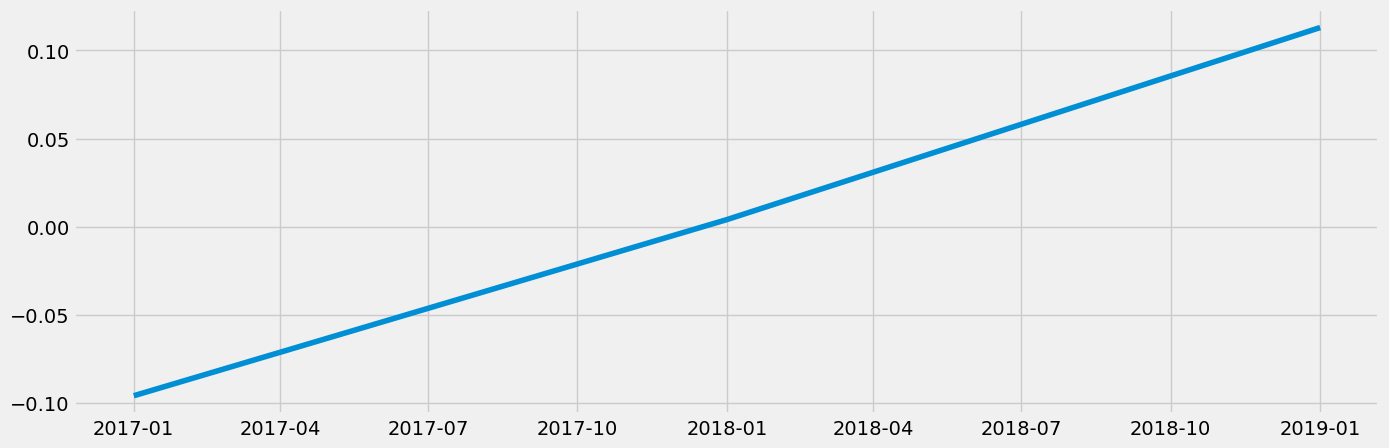

In [1139]:
# Check out what the differencing did to the time-series curve

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff)

In [1141]:
# Re-run the Dickey-Fuller test
dickey_fuller(data_diff)

Dickey-Fuller Stationarity test:


ValueError: sample size is too short to use selected regression component

**Comments:** Due to the extremely small sample size, the Dickey-Fuller Stationarity test
cannot be performed at this time, as indicated by the error above. The process of stationarizing
the time series data will need to be revisited once data for additional years becomes available.

### 9. Check your data’s autocorrelations

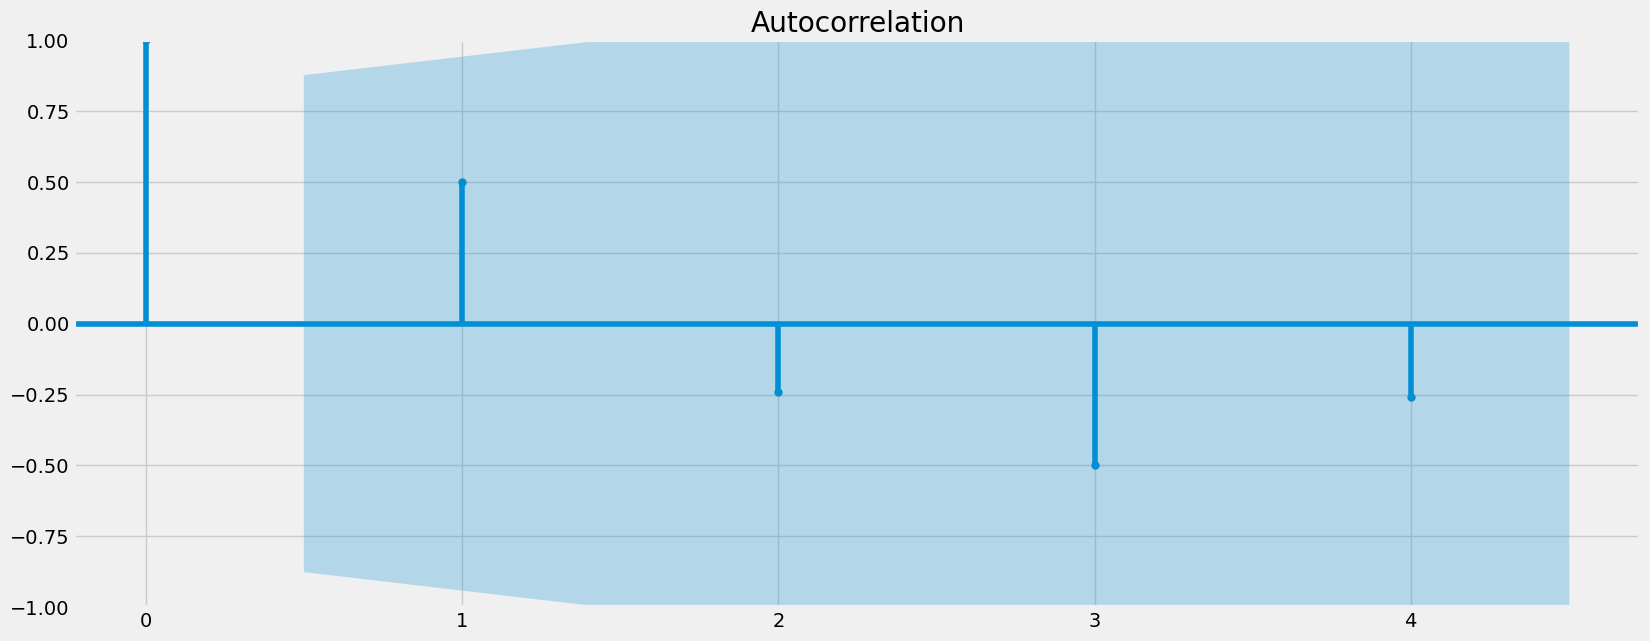

In [1152]:
# Check out a plot of autocorrelations

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # Import the autocorrelation and partial correlation plots

# Below is the autocorrelation for the data frame before differencing.
plot_acf(df_usa_nec)
plt.show()

**Comments:** From the graph above, we notice there is only one lag in the series that is outside of the confidence area, suggesting that the data could be stationary, contrary to the results of the Dickey-Fuller Stationarity test, which suggested otherwise. 
Given the very small sample size, the autocorrelation in this case cannot be conclusive. As with the Dickey-Fuller Stationarity test, autocorrelation will need to be revisited once data for additional years becomes available.